In [2]:
import pandas as pd
import numpy as np
import joblib
import xgboost
import time

In [2]:
df_D1 = joblib.load('BASES/EURUSD_D1')
df_D1['CloseS'] = df_D1.Close.shift(-1)
df_D1 = df_D1.drop(['ADR','Date','Symbol'],axis=1).dropna()
df_train= df_D1.iloc[:-int(0.8*len(df_D1)),:]#.drop(['Close'],axis=1).dropna()
df_oos = df_D1.iloc[-int(0.8*len(df_D1)):,:]#.drop(['ADR','Date'],axis=1).dropna()


In [3]:
from pycaret.regression import *
model = setup(df_train,'CloseS')
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0078,0.0001,0.0098,0.9736,0.0042,0.0058,0.2480
lar,Least Angle Regression,0.0078,0.0001,0.0098,0.9736,0.0042,0.0058,0.0040
omp,Orthogonal Matching Pursuit,0.0078,0.0001,0.0098,0.9736,0.0042,0.0058,0.0040
br,Bayesian Ridge,0.0078,0.0001,0.0098,0.9736,0.0042,0.0058,0.0040
huber,Huber Regressor,0.0078,0.0001,0.0098,0.9736,0.0042,0.0058,0.0040
catboost,CatBoost Regressor,0.0083,0.0001,0.0105,0.9697,0.0045,0.0062,0.5000
gbr,Gradient Boosting Regressor,0.0085,0.0001,0.0108,0.9682,0.0046,0.0063,0.0090
knn,K Neighbors Regressor,0.0087,0.0001,0.0108,0.9681,0.0046,0.0064,0.0050
ada,AdaBoost Regressor,0.0089,0.0001,0.0110,0.9661,0.0047,0.0066,0.0100
lightgbm,Light Gradient Boosting Machine,0.0088,0.0001,0.0112,0.9658,0.0048,0.0065,0.1700


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0078,0.0001,0.0097,0.9768,0.0041,0.0058
1,0.0087,0.0001,0.0110,0.9689,0.0047,0.0066
2,0.0085,0.0001,0.0102,0.9689,0.0043,0.0063
3,0.0092,0.0001,0.0115,0.9675,0.0048,0.0067
4,0.0065,0.0001,0.0079,0.9883,0.0034,0.0049
5,0.0066,0.0001,0.0090,0.9802,0.0038,0.0049
6,0.0071,0.0001,0.0094,0.9808,0.0040,0.0052
7,0.0079,0.0001,0.0101,0.9660,0.0043,0.0058
8,0.0071,0.0001,0.0095,0.9704,0.0040,0.0052
9,0.0083,0.0001,0.0097,0.9685,0.0041,0.0061


In [5]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0078,0.0001,0.0097,0.9768,0.0041,0.0058
1,0.0087,0.0001,0.0110,0.9689,0.0047,0.0066
2,0.0085,0.0001,0.0102,0.9689,0.0043,0.0063
3,0.0092,0.0001,0.0115,0.9675,0.0048,0.0067
4,0.0065,0.0001,0.0079,0.9883,0.0034,0.0049
5,0.0066,0.0001,0.0090,0.9802,0.0038,0.0049
6,0.0071,0.0001,0.0094,0.9808,0.0040,0.0052
7,0.0079,0.0001,0.0101,0.9660,0.0043,0.0058
8,0.0071,0.0001,0.0095,0.9704,0.0040,0.0052
9,0.0083,0.0001,0.0097,0.9685,0.0041,0.0061


In [6]:
final_lr = finalize_model(tuned_lr)

In [7]:
predictions = predict_model(final_lr, data = df_oos)
predictions

,Open,High,Low,Close,CloseS,Label
Lindex,,,,,,
2012-04-02,1.335675,1.338060,1.327825,1.333000,1.322260,1.333116
2012-04-03,1.333000,1.336765,1.321330,1.322260,1.314395,1.322532
2012-04-04,1.322260,1.323340,1.310700,1.314395,1.306290,1.314782
2012-04-05,1.314395,1.316435,1.303520,1.306290,1.309520,1.306794
2012-04-06,1.306290,1.311260,1.304975,1.309520,1.310915,1.309978
...,...,...,...,...,...,...
2021-04-05,1.176760,1.181955,1.173740,1.181690,1.187385,1.184006
2021-04-06,1.181690,1.187835,1.179500,1.187385,1.187255,1.189618
2021-04-07,1.187385,1.191480,1.186075,1.187255,1.191540,1.189490


<AxesSubplot:xlabel='Lindex'>

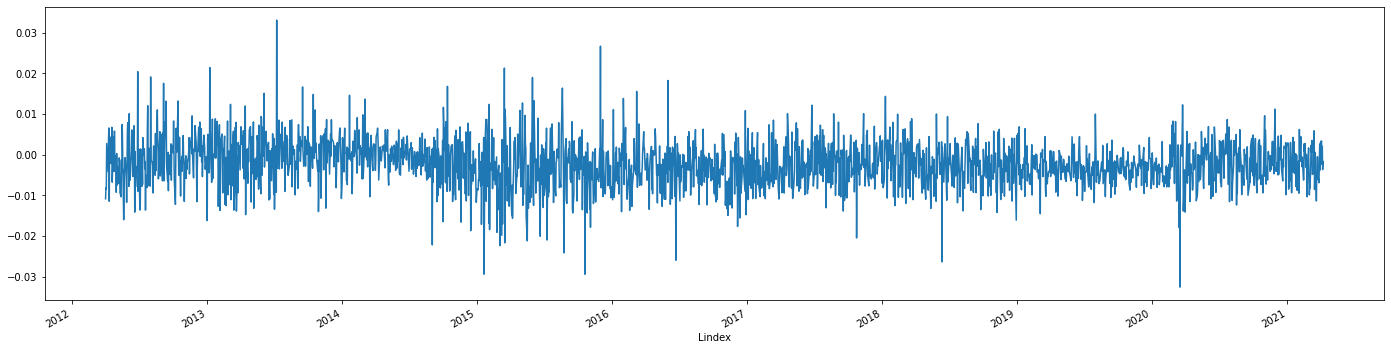

In [8]:
(predictions['CloseS']-predictions['Label']).plot(figsize=(24,6))

In [10]:
save_model(final_lr,'MODELS/EURUSD_pyc_m5_D1.dag')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='CloseS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='CloseS')),
                 ('fix_perfect', Remove_100(target='CloseS')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
          

In [69]:
final_lr = load_model('MODELS/EURUSD_pyc_m5.dag')

Transformation Pipeline and Model Successfully Loaded


In [72]:
df_D1

,Open,High,Low,Close,CloseS
Lindex,,,,,
2010-01-04,1.431640,1.445560,1.425770,1.442480,1.436445
2010-01-05,1.442480,1.448400,1.434630,1.436445,1.440135
2010-01-06,1.436445,1.443500,1.428265,1.440135,1.431715
2010-01-07,1.440135,1.444695,1.429910,1.431715,1.441495
2010-01-08,1.431715,1.443915,1.426370,1.441495,1.450830
...,...,...,...,...,...
2021-04-05,1.176760,1.181955,1.173740,1.181690,1.187385
2021-04-06,1.181690,1.187835,1.179500,1.187385,1.187255
2021-04-07,1.187385,1.191480,1.186075,1.187255,1.191540


In [12]:
df_W1 = joblib.load('BASES/EURUSD_W1')
df_W1['CloseS'] = df_W1.Close.shift(-1)
df_W1 = df_W1[['Open','High','Low','Close','CloseS']].dropna()
df_train= df_W1.iloc[:-int(0.8*len(df_W1)),:]#.drop(['Close'],axis=1).dropna()
df_oos = df_W1.iloc[-int(0.8*len(df_W1)):,:]#.drop(['ADR','Date'],axis=1).dropna()
model = setup(df_train,'CloseS')
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0167,0.0005,0.0217,0.8047,0.0092,0.0124,0.1330
br,Bayesian Ridge,0.0172,0.0005,0.0220,0.7991,0.0094,0.0128,0.1170
lr,Linear Regression,0.0175,0.0005,0.0224,0.7912,0.0095,0.0129,0.2370
lar,Least Angle Regression,0.0175,0.0005,0.0224,0.7912,0.0095,0.0129,0.0040
huber,Huber Regressor,0.0175,0.0005,0.0224,0.7896,0.0095,0.0130,0.1340
rf,Random Forest Regressor,0.0187,0.0006,0.0240,0.7628,0.0103,0.0139,0.0340
et,Extra Trees Regressor,0.0189,0.0006,0.0242,0.7589,0.0104,0.0141,0.0360
ada,AdaBoost Regressor,0.0192,0.0006,0.0243,0.7589,0.0104,0.0143,0.0130
catboost,CatBoost Regressor,0.0202,0.0007,0.0257,0.7295,0.0110,0.0151,0.9120
knn,K Neighbors Regressor,0.0196,0.0007,0.0255,0.7285,0.0109,0.0146,0.0040


In [13]:
lr = create_model('lr')
tuned_lr = tune_model(lr)
final_lr = finalize_model(tuned_lr)
predictions = predict_model(final_lr, data = df_oos)
predictions

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0174,0.0005,0.0234,0.7743,0.0099,0.0127
1,0.0151,0.0004,0.0190,0.8953,0.0081,0.0111
2,0.0169,0.0006,0.0252,0.5543,0.0109,0.0129
3,0.0112,0.0002,0.0125,0.9348,0.0053,0.0083
4,0.0158,0.0003,0.0181,0.8599,0.0077,0.0116
5,0.0160,0.0004,0.0190,0.8465,0.0080,0.0117
6,0.0244,0.0010,0.0309,0.6798,0.0135,0.0187
7,0.0217,0.0010,0.0311,0.7410,0.0132,0.0158
8,0.0144,0.0004,0.0206,0.8170,0.0087,0.0105
9,0.0218,0.0006,0.0242,0.8093,0.0102,0.0160


,Open,High,Low,Close,CloseS,Label
Lindex,,,,,,
2012-04-09,1.308565,1.321280,1.303310,1.307725,1.321420,1.315563
2012-04-16,1.304380,1.322835,1.299495,1.321420,1.325305,1.324426
2012-04-23,1.320745,1.327005,1.310465,1.325305,1.308330,1.328563
2012-04-30,1.323980,1.328425,1.308030,1.308330,1.291640,1.315060
2012-05-07,1.296160,1.306545,1.290520,1.291640,1.278270,1.301346
...,...,...,...,...,...,...
2021-03-08,1.192620,1.198990,1.183550,1.195295,1.190460,1.209282
2021-03-15,1.195015,1.198885,1.187380,1.190460,1.179420,1.206987
2021-03-22,1.188365,1.194685,1.176170,1.179420,1.176300,1.195923


<AxesSubplot:xlabel='Lindex'>

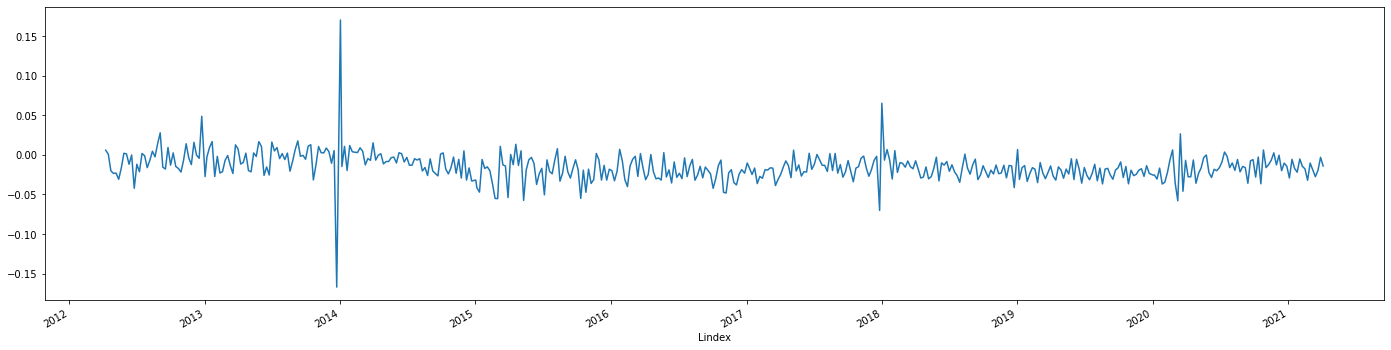

In [14]:
(predictions['CloseS']-predictions['Label']).plot(figsize=(24,6))

In [15]:
save_model(final_lr,'MODELS/EURUSD_pyc_m5_W1.dag')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='CloseS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='CloseS')),
                 ('fix_perfect', Remove_100(target='CloseS')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
          

In [74]:
%%time
import xgboost as xg
from sklearn.metrics import *
from sklearn.linear_model import Lasso,ElasticNet,Ridge
import warnings
warnings.filterwarnings("ignore")
import joblib

df_D1 = joblib.load('BASES/EURUSD_D1')
df_D1['CloseS'] = df_D1.Close.shift(-1)
df_D1 = df_D1.drop(['ADR','Date','Symbol'],axis=1).dropna()
Xtrain= df_D1.iloc[:-int(0.7*len(df_D1)),:].dropna()
ytrain = Xtrain['CloseS']
Xtrain = Xtrain.drop(['CloseS'],axis=1)
Xtest = df_D1.iloc[-int(0.7*len(df_D1)):,:].dropna()
ytest = Xtest['CloseS']
Xtest = Xtest.drop(['CloseS'],axis=1)


CPU times: user 9.66 ms, sys: 4.4 ms, total: 14.1 ms
Wall time: 16.4 ms


In [75]:
%%time
df = joblib.load('BASES/USDCAD_m5')
_ticker = 'USDCAD'
_period = 'm5'

df['Date'] = df.index
df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
df1 = pd.DataFrame(index=df.Date.unique())
df1['Lindex'] = list((df.groupby('Date').Date.first()))
df1['Open'] = list((df.groupby('Date').Open.first()))
df1['High'] = list((df.groupby('Date').High.max()))
df1['Low'] = list((df.groupby('Date').Low.min()))
df1['Close'] = list((df.groupby('Date').Close.last()))
# df1['CloseS'] = df1.Close.shift(-1)
df1['OpenShift'] = df1.Open.shift(-1)
df1['HighShift'] = df1.High.shift(-1)
df1['LowShift'] = df1.Low.shift(-1)
df1['CloseShift'] = df1.Close.shift(-1)


df1_Xtrain = df1[['Open','High','Low','Close']].iloc[:int(0.8*len(df_D1)),:]
df1_Xtest = df1[['Open','High','Low','Close']].iloc[int(0.8*len(df_D1)):-1,:]
df1_yopen = df1['OpenShift'].iloc[:int(0.8*len(df_D1))]
df1_yhigh = df1['HighShift'] .iloc[:int(0.8*len(df_D1))]
df1_ylow = df1['LowShift'].iloc[:int(0.8*len(df_D1))]
df1_yclose = df1['CloseShift'].iloc[:int(0.8*len(df_D1))]
df1_final = df1[['Open','High','Low','Close']]

open_pred = pd.DataFrame()
high_pred = pd.DataFrame()
low_pred = pd.DataFrame()
close_pred = pd.DataFrame()

_lr_open =  LinearRegression().fit(df1_Xtrain, df1_yopen)

_lr_high =  LinearRegression().fit(df1_Xtrain, df1_yhigh)

_lr_low = LinearRegression().fit(df1_Xtrain, df1_ylow)

_lr_close = LinearRegression().fit(df1_Xtrain, df1_yclose)

print('\nRMSE OPEN : ',np.sqrt(MSE(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))))
print('RMSE HIGH : ',np.sqrt(MSE(df1['HighShift'].iloc[int(0.8*len(df_D1)):-1], _lr_high.predict(df1_Xtest))))
print('RMSE LOW : ',np.sqrt(MSE(df1['LowShift'].iloc[int(0.8*len(df_D1)):-1], _lr_low.predict(df1_Xtest))))
print('RMSE CLOSE : ',np.sqrt(MSE(df1['CloseShift'].iloc[int(0.8*len(df_D1)):-1], _lr_close.predict(df1_Xtest))))
print()

joblib.dump(_lr_open,'MODELS/lr_open_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_high,'MODELS/lr_high_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_low,'MODELS/lr_low_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_close,'MODELS/lr_close_'+_ticker+'_'+_period+'.dag')
print('\n\n')

# Regression metrics
open_explained_variance=metrics.explained_variance_score(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_mean_absolute_error=metrics.mean_absolute_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest)) 
open_mse=metrics.mean_squared_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest)) 
open_mean_squared_log_error=metrics.mean_squared_log_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_median_absolute_error=metrics.median_absolute_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_r2=metrics.r2_score(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))

print('explained_variance: ', round(open_explained_variance,4))    
print('mean_squared_log_error: ', round(open_mean_squared_log_error,4))
print('r2: ', round(open_r2,4))
print('MAE: ', round(open_mean_absolute_error,4))
print('MSE: ', round(open_mse,4))
print('RMSE: ', round(open_np.sqrt(mse),4))

print('\n\n')

open_pred['Predict'] = _lr_open.predict(df1_final)

high_pred['Predict'] = _lr_high.predict(df1_final)

low_pred['Predict'] = _lr_low.predict(df1_final)

close_pred['Predict'] = _lr_close.predict(df1_final)

df1['OpenS'] = open_pred.Predict.values
df1['HighS'] = high_pred.Predict.values
df1['LowS'] = low_pred.Predict.values
df1['CloseS'] = close_pred.Predict.values

df1['Symbol'] = _ticker

df1 = df1.drop(['OpenShift','HighShift','LowShift','CloseShift'],axis=1)

df1 = df1.sort_values('Lindex') ##########
df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True) #####
df1['Date'] = df1.Lindex
df1 = df1.drop(['Lindex'],axis=1)

print('\ndf Daily : ')
print(df1)



RMSE OPEN :  0.0013168175314595926
RMSE HIGH :  0.004225513239116863
RMSE LOW :  0.003872153376764889
RMSE CLOSE :  0.005777310424482164






NameError: name 'metrics' is not defined

In [70]:
%%time
df = joblib.load('BASES/EURUSD_m5')
_ticker = 'EURUSD'
_period = 'm5'

df['Date'] = df.index
df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
df1 = pd.DataFrame(index=df.Date.unique())
df1['Lindex'] = list((df.groupby('Date').Date.first()))
df1['Open'] = list((df.groupby('Date').Open.first()))
df1['High'] = list((df.groupby('Date').High.max()))
df1['Low'] = list((df.groupby('Date').Low.min()))
df1['Close'] = list((df.groupby('Date').Close.last()))
# df1['CloseS'] = df1.Close.shift(-1)
df1['OpenShift'] = df1.Open.shift(-1)
df1['HighShift'] = df1.High.shift(-1)
df1['LowShift'] = df1.Low.shift(-1)
df1['CloseShift'] = df1.Close.shift(-1)


df1_Xtrain = df1[['Open','High','Low','Close']].iloc[:int(0.8*len(df_D1)),:]
df1_Xtest = df1[['Open','High','Low','Close']].iloc[int(0.8*len(df_D1)):-1,:]
df1_yopen = df1['OpenShift'].iloc[:int(0.8*len(df_D1))]
df1_yhigh = df1['HighShift'] .iloc[:int(0.8*len(df_D1))]
df1_ylow = df1['LowShift'].iloc[:int(0.8*len(df_D1))]
df1_yclose = df1['CloseShift'].iloc[:int(0.8*len(df_D1))]
df1_final = df1[['Open','High','Low','Close']]

open_pred = pd.DataFrame()
high_pred = pd.DataFrame()
low_pred = pd.DataFrame()
close_pred = pd.DataFrame()

_lr_open =  joblib.load('MODELS/lr_open_'+_ticker+'_'+_period+'.dag')
open_pred['Predict'] = _model.predict(df1_final)

_lr_high =  joblib.load('MODELS/lr_high_'+_ticker+'_'+_period+'.dag')
high_pred['Predict'] = _model.predict(df1_final)

_lr_low = joblib.load('MODELS/lr_low_'+_ticker+'_'+_period+'.dag')
low_pred['Predict'] = _model.predict(df1_final)

_lr_close = joblib.load('MODELS/lr_close_'+_ticker+'_'+_period+'.dag')
close_pred['Predict'] = _model.predict(df1_final)

print('\nRMSE OPEN : ',np.sqrt(MSE(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))))
print('RMSE HIGH : ',np.sqrt(MSE(df1['HighShift'].iloc[int(0.8*len(df_D1)):-1], _lr_high.predict(df1_Xtest))))
print('RMSE LOW : ',np.sqrt(MSE(df1['LowShift'].iloc[int(0.8*len(df_D1)):-1], _lr_low.predict(df1_Xtest))))
print('RMSE CLOSE : ',np.sqrt(MSE(df1['CloseShift'].iloc[int(0.8*len(df_D1)):-1], _lr_close.predict(df1_Xtest))))
print()


open_pred['Predict'] = _lr_open.predict(df1_final)

high_pred['Predict'] = _lr_high.predict(df1_final)

low_pred['Predict'] = _lr_low.predict(df1_final)

close_pred['Predict'] = _lr_close.predict(df1_final)

df1['OpenS'] = open_pred.Predict.values
df1['HighS'] = high_pred.Predict.values
df1['LowS'] = low_pred.Predict.values
df1['CloseS'] = close_pred.Predict.values

df1['Symbol'] = _ticker

df1 = df1.drop(['OpenShift','HighShift','LowShift','CloseShift'],axis=1)

df1 = df1.sort_values('Lindex') ##########
df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True) #####
df1['Date'] = df1.Lindex
df1 = df1.drop(['Lindex'],axis=1)

print('\ndf Daily : ')
print(df1)



RMSE OPEN :  0.0006731787481797324
RMSE HIGH :  0.003172870507666786
RMSE LOW :  0.0031674875695940925
RMSE CLOSE :  0.004481000321201588


df Daily : 
                Open      High       Low     Close     OpenS     HighS  \
Lindex                                                                   
2010-01-04  1.431640  1.445560  1.425770  1.442480  1.442536  1.449313   
2010-01-05  1.442480  1.448400  1.434630  1.436445  1.436349  1.442655   
2010-01-06  1.436445  1.443500  1.428265  1.440135  1.440122  1.446307   
2010-01-07  1.440135  1.444695  1.429910  1.431715  1.431575  1.438103   
2010-01-08  1.431715  1.443915  1.426370  1.441495  1.441552  1.447975   
...              ...       ...       ...       ...       ...       ...   
2021-04-09  1.191540  1.192010  1.186700  1.190025  1.189966  1.194352   
2021-04-12  1.189590  1.191920  1.187120  1.191180  1.191169  1.195392   
2021-04-13  1.191180  1.195595  1.187735  1.195390  1.195387  1.200044   
2021-04-14  1.195395  1.198740  1

In [21]:
%%time
_model = xg.XGBRegressor(objective ='reg:squarederror',
                    n_estimators = 9, seed = 42)
_model.fit(Xtrain,ytrain)
# Predict the model
pred = _model.predict(Xtest)

# RMSE Computation
rmse = np.sqrt(MSE(ytest, pred))

print(rmse)

0.060027739819419626
CPU times: user 186 ms, sys: 20.3 ms, total: 206 ms
Wall time: 16.2 ms


In [78]:
len(df1),len(df1_Xtrain),len(df1_Xtest),len(df1_yopen),len(df1_yhigh),len(df1_ylow),len(df1_yclose),len(df1_final)

(2925, 586, 2338, 586, 586, 586, 586, 2925)

In [ ]:
##################
###. ARIMA

In [171]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df_D1 = joblib.load('BASES/EURUSD_D1')
df_D1 = df_D1[['Symbol','Date','Open','High','Low','Close']]

resultats = pd.DataFrame()

data = df_D1.Close

print('split à ',int(0.8*len(df_D1.Close)),' sur', len(df_D1))

train = df_D1.Close.iloc[:int(0.8*len(df_D1.Close))]
test = train = df_D1.Close.iloc[int(0.8*len(df_D1.Close)):]

resultats['Original'] = data

split à  2340  sur 2926


In [172]:
%%time
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# fit model
model = AutoReg(data,lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=0, end=len(data), dynamic=True)

resultats['AutoRegression'] = yhat.values


/Users/dag26/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/dag26/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Length of values (2927) does not match length of index (2926)

<AxesSubplot:xlabel='Lindex'>

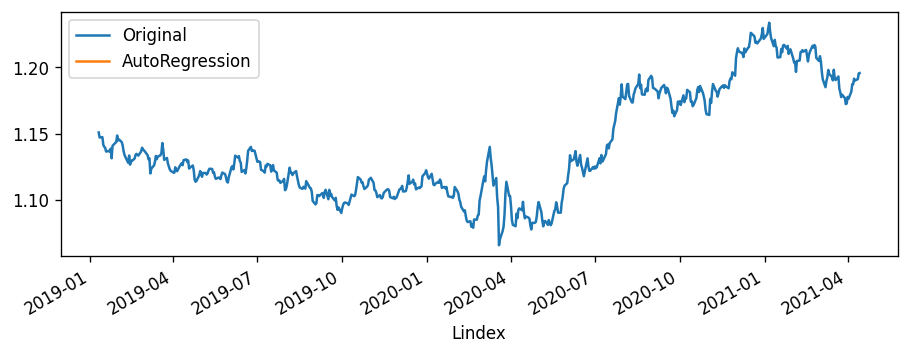

In [161]:
resultats.plot()

In [162]:
resultats

,Original,AutoRegression
Lindex,,
2019-01-10,1.150820,NaN
2019-01-11,1.146990,NaN
2019-01-14,1.147275,NaN
2019-01-15,1.141430,NaN
2019-01-16,1.139960,NaN
...,...,...
2021-04-08,1.191540,NaN
2021-04-09,1.190025,NaN
2021-04-12,1.191175,NaN


In [167]:
len(data)

2926

In [ ]:
df = joblib.load('BASES/USDCAD_m5')
_ticker = 'USDCAD'
_period = 'm5'

df['Date'] = df.index
df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
df1 = pd.DataFrame(index=df.Date.unique())
df1['Lindex'] = list((df.groupby('Date').Date.first()))
df1['Open'] = list((df.groupby('Date').Open.first()))
df1['High'] = list((df.groupby('Date').High.max()))
df1['Low'] = list((df.groupby('Date').Low.min()))
df1['Close'] = list((df.groupby('Date').Close.last()))
# df1['CloseS'] = df1.Close.shift(-1)
df1['OpenShift'] = df1.Open.shift()
df1['HighShift'] = df1.High.shift()
df1['LowShift'] = df1.Low.shift()
df1['CloseShift'] = df1.Close.shift()


df1_Xtrain = df1[['Open','High','Low','Close']].iloc[:int(0.8*len(df_D1)),:]
df1_Xtest = df1[['Open','High','Low','Close']].iloc[int(0.8*len(df_D1)):-1,:]
df1_yopen = df1['OpenShift'].iloc[:int(0.8*len(df_D1))]
df1_yhigh = df1['HighShift'] .iloc[:int(0.8*len(df_D1))]
df1_ylow = df1['LowShift'].iloc[:int(0.8*len(df_D1))]
df1_yclose = df1['CloseShift'].iloc[:int(0.8*len(df_D1))]
df1_final = df1[['Open','High','Low','Close']]

open_pred = pd.DataFrame()
high_pred = pd.DataFrame()
low_pred = pd.DataFrame()
close_pred = pd.DataFrame()

_lr_open =  LinearRegression().fit(df1_Xtrain, df1_yopen)

_lr_high =  LinearRegression().fit(df1_Xtrain, df1_yhigh)

_lr_low = LinearRegression().fit(df1_Xtrain, df1_ylow)

_lr_close = LinearRegression().fit(df1_Xtrain, df1_yclose)

print('\nRMSE OPEN : ',np.sqrt(MSE(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))))
print('RMSE HIGH : ',np.sqrt(MSE(df1['HighShift'].iloc[int(0.8*len(df_D1)):-1], _lr_high.predict(df1_Xtest))))
print('RMSE LOW : ',np.sqrt(MSE(df1['LowShift'].iloc[int(0.8*len(df_D1)):-1], _lr_low.predict(df1_Xtest))))
print('RMSE CLOSE : ',np.sqrt(MSE(df1['CloseShift'].iloc[int(0.8*len(df_D1)):-1], _lr_close.predict(df1_Xtest))))
print()

joblib.dump(_lr_open,'MODELS/lr_open_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_high,'MODELS/lr_high_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_low,'MODELS/lr_low_'+_ticker+'_'+_period+'.dag')
joblib.dump(_lr_close,'MODELS/lr_close_'+_ticker+'_'+_period+'.dag')
print('\n\n')

# Regression metrics
open_explained_variance=metrics.explained_variance_score(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_mean_absolute_error=metrics.mean_absolute_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest)) 
open_mse=metrics.mean_squared_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest)) 
open_mean_squared_log_error=metrics.mean_squared_log_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_median_absolute_error=metrics.median_absolute_error(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))
open_r2=metrics.r2_score(df1['OpenShift'].iloc[int(0.8*len(df_D1)):-1], _lr_open.predict(df1_Xtest))

print('explained_variance: ', round(open_explained_variance,4))    
print('mean_squared_log_error: ', round(open_mean_squared_log_error,4))
print('r2: ', round(open_r2,4))
print('MAE: ', round(open_mean_absolute_error,4))
print('MSE: ', round(open_mse,4))
print('RMSE: ', round(open_np.sqrt(mse),4))

print('\n\n')

open_pred['Predict'] = _lr_open.predict(df1_final)

high_pred['Predict'] = _lr_high.predict(df1_final)

low_pred['Predict'] = _lr_low.predict(df1_final)

close_pred['Predict'] = _lr_close.predict(df1_final)

df1['OpenS'] = open_pred.Predict.values
df1['HighS'] = high_pred.Predict.values
df1['LowS'] = low_pred.Predict.values
df1['CloseS'] = close_pred.Predict.values

df1['Symbol'] = _ticker

df1 = df1.drop(['OpenShift','HighShift','LowShift','CloseShift'],axis=1)

df1 = df1.sort_values('Lindex') ##########
df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True) #####
df1['Date'] = df1.Lindex
df1 = df1.drop(['Lindex'],axis=1)

print('\ndf Daily : ')
print(df1)